In [1]:
import pickle
import time

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm

from astropy.table import Table

In [13]:
data_dir = 'data/q_photo_z_train'
with open(f'{data_dir}/feature_lists/features_sdssdr16+all_deacls8tr_QSO+GALAXY_20201212143658.pkl', 'rb') as f:
    features_20 = pickle.load(f)
with open(f'{data_dir}/feature_lists/features_sdssdr16+psdr2+all_deacls8tr_QSO+GALAXY_20201212133711.pkl', 'rb') as f:
    features_35 = pickle.load(f)
with open(f'{data_dir}/feature_lists/features_deacls8tr_QSO+GALAXY_20201212135641.pkl', 'rb') as f:
    features_21 = pickle.load(f)
with open(f'{data_dir}/feature_lists/features_psdr2+all_deacls8tr_QSO+GALAXY_20201212142333.pkl', 'rb') as f:
    features_22 = pickle.load(f)

In [11]:
features_20

['sdssdr16_u_psf',
 'sdssdr16_g_psf',
 'sdssdr16_r_psf',
 'sdssdr16_i_psf',
 'sdssdr16_z_psf',
 'sdssdr16_u_cmodel',
 'sdssdr16_i_cmodel',
 'sdssdr16_u-g_psf',
 'sdssdr16_u-r_psf',
 'sdssdr16_u-i_psf',
 'sdssdr16_u-z_psf',
 'sdssdr16_u_psf-cmodel',
 'sdssdr16_g-i_psf',
 'sdssdr16_g_psf-cmodel',
 'sdssdr16_r-i_psf',
 'sdssdr16_i-z_psf',
 'sdssdr16_i_psf-cmodel',
 'sdssdr16_u_cmodel-decals8tr_Lw1',
 'sdssdr16_u_cmodel-decals8tr_Lw2',
 'sdssdr16_g_cmodel-decals8tr_Lw1',
 'sdssdr16_g_cmodel-decals8tr_Lw2',
 'sdssdr16_r_cmodel-decals8tr_Lw1',
 'sdssdr16_r_cmodel-decals8tr_Lw2',
 'sdssdr16_i_cmodel-decals8tr_Lw1',
 'sdssdr16_i_cmodel-decals8tr_Lw2',
 'sdssdr16_z_cmodel-decals8tr_Lw1',
 'sdssdr16_z_cmodel-decals8tr_Lw2',
 'decals8tr_Lw1-Lw2',
 'decals8tr_Lw1',
 'decals8tr_Lw2',
 'decals8tr_g',
 'decals8tr_r',
 'decals8tr_z',
 'decals8tr_g-r',
 'decals8tr_g-z',
 'decals8tr_r-z',
 'sdssdr16_g_cmodel-decals8tr_g',
 'sdssdr16_r_cmodel-decals8tr_r',
 'sdssdr16_z_cmodel-decals8tr_z']

In [12]:
features_35

['sdssdr16_u_psf',
 'sdssdr16_g_psf',
 'sdssdr16_r_psf',
 'sdssdr16_i_psf',
 'sdssdr16_z_psf',
 'sdssdr16_u_cmodel',
 'sdssdr16_i_cmodel',
 'sdssdr16_u-g_psf',
 'sdssdr16_u-r_psf',
 'sdssdr16_u-i_psf',
 'sdssdr16_u-z_psf',
 'sdssdr16_u_psf-cmodel',
 'sdssdr16_g-i_psf',
 'sdssdr16_g_psf-cmodel',
 'sdssdr16_r-i_psf',
 'sdssdr16_i-z_psf',
 'sdssdr16_i_psf-cmodel',
 'sdssdr16_u_cmodel-decals8tr_Lw1',
 'sdssdr16_u_cmodel-decals8tr_Lw2',
 'sdssdr16_g_cmodel-decals8tr_Lw1',
 'sdssdr16_g_cmodel-decals8tr_Lw2',
 'sdssdr16_r_cmodel-decals8tr_Lw1',
 'sdssdr16_r_cmodel-decals8tr_Lw2',
 'sdssdr16_i_cmodel-decals8tr_Lw1',
 'sdssdr16_i_cmodel-decals8tr_Lw2',
 'sdssdr16_z_cmodel-decals8tr_Lw1',
 'sdssdr16_z_cmodel-decals8tr_Lw2',
 'psdr2_i_kron',
 'psdr2_y_kron',
 'psdr2_g_psf',
 'psdr2_r_psf',
 'psdr2_i_psf',
 'psdr2_z_psf',
 'psdr2_y_psf',
 'psdr2_g-i_psf',
 'psdr2_g-y_psf',
 'psdr2_r-i_psf',
 'psdr2_r-y_psf',
 'psdr2_i-z_psf',
 'psdr2_i-y_psf',
 'psdr2_i_psf-kron',
 'psdr2_z-y_psf',
 'psdr2_y_psf-k

In [14]:
features_21

['decals8tr_Lw1-Lw2',
 'decals8tr_Lw1',
 'decals8tr_Lw2',
 'decals8tr_g',
 'decals8tr_r',
 'decals8tr_z',
 'decals8tr_g-r',
 'decals8tr_g-z',
 'decals8tr_r-z',
 'decals8tr_g-Lw1',
 'decals8tr_g-Lw2',
 'decals8tr_r-Lw1',
 'decals8tr_r-Lw2',
 'decals8tr_z-Lw1',
 'decals8tr_z-Lw2']

In [15]:
features_22

['psdr2_i_kron',
 'psdr2_y_kron',
 'psdr2_g_psf',
 'psdr2_r_psf',
 'psdr2_i_psf',
 'psdr2_z_psf',
 'psdr2_y_psf',
 'psdr2_g-i_psf',
 'psdr2_g-y_psf',
 'psdr2_r-i_psf',
 'psdr2_r-y_psf',
 'psdr2_i-z_psf',
 'psdr2_i-y_psf',
 'psdr2_i_psf-kron',
 'psdr2_z-y_psf',
 'psdr2_y_psf-kron',
 'psdr2_g_kron-decals8tr_Lw1',
 'psdr2_g_kron-decals8tr_Lw2',
 'psdr2_r_kron-decals8tr_Lw1',
 'psdr2_r_kron-decals8tr_Lw2',
 'psdr2_i_kron-decals8tr_Lw1',
 'psdr2_i_kron-decals8tr_Lw2',
 'psdr2_z_kron-decals8tr_Lw1',
 'psdr2_z_kron-decals8tr_Lw2',
 'psdr2_y_kron-decals8tr_Lw1',
 'psdr2_y_kron-decals8tr_Lw2',
 'decals8tr_Lw1-Lw2',
 'decals8tr_Lw1',
 'decals8tr_Lw2',
 'decals8tr_g',
 'decals8tr_r',
 'decals8tr_z',
 'decals8tr_g-r',
 'decals8tr_g-z',
 'decals8tr_r-z',
 'psdr2_g_kron-decals8tr_g',
 'psdr2_r_kron-decals8tr_r',
 'psdr2_z_kron-decals8tr_z']

In [35]:
dfs = []

feas = pd.read_pickle(
    f'{data_dir}/part-00000.train_01.features.gz_pkl',
    compression='gzip'
)#[['ra', 'dec', 'zspec'] + features_35]
dfs.append(feas)

feas = pd.read_pickle(
    f'{data_dir}/part-00000.train_02.features.gz_pkl',
    compression='gzip'
)#[['ra', 'dec', 'zspec'] + features_35]
dfs.append(feas)

train_20 = pd.concat(dfs)

In [53]:
train_20.sort_values(by=['zspec'], inplace=True)

In [54]:
train_20

,nrow,objID,ra,dec,zspec,zspec_conf,zspec_source,class,subclass,class1,...,ra_,dec_,#na_,desig_,ra_hms_,dec_dms_,sep_,lis_brickid_objid,__kfold_idx__,__nrow__
9302,178392,95860241962698474,24.196261,-10.109838,-0.011447,-999.0,SDSS,GALAXY,N/A,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4662
9681,610236,131851704557834825,170.455790,19.878579,-0.009112,-999.0,SDSS,GALAXY,N/A,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4821
9556,457533,108761842401641204,184.240161,0.634044,-0.007947,-999.0,SDSS,GALAXY,N/A,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4795
9540,436446,145111220914532448,122.091429,30.926546,-0.005114,-999.0,SDSS,GALAXY,N/A,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4786
9500,391002,138420188328417240,18.832807,25.355562,-0.002058,-999.0,SDSS,GALAXY,N/A,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586173,9,NaN,332.752500,-63.348833,6.880000,NaN,NaN,QSO,NaN,NaN,...,332.752500,-63.348833,b'VDES ',b'J2211-6320 ',b'22:11:00.60',b'-63:20:55.8 ',0.109977,36014_707,1,294992
586172,8,NaN,41.732917,-52.330528,6.900000,NaN,NaN,QSO,NaN,NaN,...,41.732917,-52.330528,b'VDES ',b'J0246-5219 ',b'02:46:55.90',b'-52:19:49.9 ',0.115540,69318_816,0,291182
586171,5,NaN,129.945333,39.003194,6.905000,NaN,NaN,QSO,NaN,NaN,...,129.945333,39.003194,b'DELS ',b'J0839+3900 ',b'08:39:46.88',b'+39:00:11.5 ',0.045578,538930_1761,0,291181
586174,235245,115503574615473770,357.461364,6.252772,6.949000,-999.0,Paris18,QSO,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,291183


In [ ]:
train_20[train_20['class'] == 'GALAXY']

In [49]:
train_20['sdssdr16_u_psf'].isna().sum()

7539

In [138]:
6937 * 100 / 586176

1.1834329621137678

In [50]:
train_20['psdr2_g_psf'].isna().sum()

6937

In [51]:
train_20['decals8tr_g'].isna().sum()

5999

In [62]:
def angular_dist(ra_01, dec_01, ra_02, dec_02):
#     ra_01, dec_01 = x[0], x[1]
#     ra_02, dec_02 = y[0], y[1]
    ra_01 = ra_01 * np.pi / 180
    ra_02 = ra_02 * np.pi / 180
    dec_01 = dec_01 * np.pi / 180
    dec_02 = dec_02 * np.pi / 180
    return np.arccos(np.minimum(
        np.sin(dec_01) * np.sin(dec_02) +
        np.cos(dec_01) * np.cos(dec_02) * np.cos(ra_01 - ra_02),
        1
    )) * 180 / (np.pi)

In [117]:
feas_HZQ = pd.read_pickle(
    f'{data_dir}/part-00000.new_HZQ.features.gz_pkl',
    compression='gzip'
)
feas_HZQ['dist'] = angular_dist(feas_HZQ['RA'], feas_HZQ['DEC'], feas_HZQ['ls_ra'], feas_HZQ['ls_dec'])
feas_HZQ = feas_HZQ[~feas_HZQ['dist'].isna()]
feas_HZQ

,index,RA,DEC,Z,__workxid__,ls_sep_input,ls_release,ls_brickid,ls_brickname,ls_objid,...,phot_is_test_xxln_m16,phot_is_test_s82x_l19,phot_is_test_s82x_a17,phot_is_test_qso,phot_is_test_star,phot_is_test_gal,phot_is_spec_sdss,phot_test_field,__nrow__,dist
0,0,0.448500,-3.879860,5.27,0,27.131434,8000.0,307337.0,b'0003m040',7621.0,...,False,False,False,False,False,False,False,-,1,0.007537
1,0,0.448500,-3.879860,5.27,0,16.257677,8000.0,307337.0,b'0003m040',7622.0,...,False,False,False,False,False,False,False,-,2,0.004516
2,0,0.448500,-3.879860,5.27,0,23.504122,8000.0,307337.0,b'0003m040',7623.0,...,False,False,False,False,False,False,False,-,3,0.006529
3,0,0.448500,-3.879860,5.27,0,19.787301,8000.0,307337.0,b'0003m040',7624.0,...,False,False,False,False,False,False,False,-,4,0.005496
4,0,0.448500,-3.879860,5.27,0,27.545885,8000.0,307337.0,b'0003m040',7625.0,...,False,False,False,False,False,False,False,-,5,0.007652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8319,463,334.018167,-5.004883,6.15,463,2.568359,8000.0,302922.0,b'3340m050',2429.0,...,False,False,False,False,False,False,False,-,8320,0.000713
8320,463,334.018167,-5.004883,6.15,463,9.695348,8000.0,302922.0,b'3340m050',2473.0,...,False,False,False,False,False,False,False,-,8321,0.002693
8321,463,334.018167,-5.004883,6.15,463,25.530853,8000.0,302922.0,b'3340m050',2499.0,...,False,False,False,False,False,False,False,-,8322,0.007092
8322,463,334.018167,-5.004883,6.15,463,29.440294,8000.0,302922.0,b'3340m050',2538.0,...,False,False,False,False,False,False,False,-,8323,0.008178


In [118]:
feas_HZQ

,index,RA,DEC,Z,__workxid__,ls_sep_input,ls_release,ls_brickid,ls_brickname,ls_objid,...,phot_is_test_xxln_m16,phot_is_test_s82x_l19,phot_is_test_s82x_a17,phot_is_test_qso,phot_is_test_star,phot_is_test_gal,phot_is_spec_sdss,phot_test_field,__nrow__,dist
0,0,0.448500,-3.879860,5.27,0,27.131434,8000.0,307337.0,b'0003m040',7621.0,...,False,False,False,False,False,False,False,-,1,0.007537
1,0,0.448500,-3.879860,5.27,0,16.257677,8000.0,307337.0,b'0003m040',7622.0,...,False,False,False,False,False,False,False,-,2,0.004516
2,0,0.448500,-3.879860,5.27,0,23.504122,8000.0,307337.0,b'0003m040',7623.0,...,False,False,False,False,False,False,False,-,3,0.006529
3,0,0.448500,-3.879860,5.27,0,19.787301,8000.0,307337.0,b'0003m040',7624.0,...,False,False,False,False,False,False,False,-,4,0.005496
4,0,0.448500,-3.879860,5.27,0,27.545885,8000.0,307337.0,b'0003m040',7625.0,...,False,False,False,False,False,False,False,-,5,0.007652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8319,463,334.018167,-5.004883,6.15,463,2.568359,8000.0,302922.0,b'3340m050',2429.0,...,False,False,False,False,False,False,False,-,8320,0.000713
8320,463,334.018167,-5.004883,6.15,463,9.695348,8000.0,302922.0,b'3340m050',2473.0,...,False,False,False,False,False,False,False,-,8321,0.002693
8321,463,334.018167,-5.004883,6.15,463,25.530853,8000.0,302922.0,b'3340m050',2499.0,...,False,False,False,False,False,False,False,-,8322,0.007092
8322,463,334.018167,-5.004883,6.15,463,29.440294,8000.0,302922.0,b'3340m050',2538.0,...,False,False,False,False,False,False,False,-,8323,0.008178


In [119]:
t_min = feas_HZQ.groupby(['RA', 'DEC']).min()['dist']
feas_HZQ_01 = feas_HZQ.merge(t_min, how='inner', on=['RA', 'DEC'])
feas_HZQ_01 = feas_HZQ_01[np.abs(feas_HZQ_01['dist_x'] - feas_HZQ_01['dist_y']) < 1e-10]
feas_HZQ_01

/tmp/ipykernel_139582/3358722837.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  t_min = feas_HZQ.groupby(['RA', 'DEC']).min()['dist']


,index,RA,DEC,Z,__workxid__,ls_sep_input,ls_release,ls_brickid,ls_brickname,ls_objid,...,phot_is_test_s82x_l19,phot_is_test_s82x_a17,phot_is_test_qso,phot_is_test_star,phot_is_test_gal,phot_is_spec_sdss,phot_test_field,__nrow__,dist_x,dist_y
16,0,0.448500,-3.879860,5.27,0,0.019678,8000.0,307337.0,b'0003m040',7864.0,...,False,False,False,False,False,False,-,17,0.000006,0.000006
25,1,0.637160,13.242700,5.82,1,0.008399,8000.0,406094.0,b'0006p132',2401.0,...,False,False,False,False,False,False,-,26,0.000002,0.000002
44,2,0.638500,21.456950,6.19,2,0.012336,8000.0,451504.0,b'0006p215',1681.0,...,False,False,False,False,False,False,-,45,0.000004,0.000004
65,3,1.265620,21.751710,5.36,3,0.019852,8000.0,452848.0,b'0012p217',2420.0,...,False,False,False,False,False,False,-,66,0.000006,0.000006
79,4,1.580770,13.613800,4.86,4,0.033833,8000.0,407502.0,b'0016p135',4264.0,...,False,False,False,False,False,False,-,80,0.000009,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,458,281.336167,53.763150,6.18,458,0.159288,8001.0,597980.0,b'2811p537',3069.0,...,False,False,False,False,False,False,-,8257,0.000044,0.000044
8254,459,288.647667,63.247928,5.96,459,0.100210,8001.0,626634.0,b'2884p632',2528.0,...,False,False,False,False,False,False,-,8262,0.000028,0.000028
8266,460,306.351292,-4.822744,5.84,460,0.108427,8000.0,304248.0,b'3064m047',754.0,...,False,False,False,False,False,False,-,8274,0.000030,0.000030
8284,461,307.763583,-5.195889,5.80,461,0.096344,8000.0,301381.0,b'3077m052',6148.0,...,False,False,False,False,False,False,-,8292,0.000027,0.000027


In [120]:
max(list(t_min)) * 3600

2.881770860935965

In [141]:
75 * 100 / 456

16.44736842105263

In [121]:
feas_HZQ_01['sdssdr16_u_cmodel'].isna().sum()

156

In [122]:
feas_HZQ_01['psdr2_g_psf'].isna().sum()

75

In [123]:
feas_HZQ_01['decals8tr_g'].isna().sum()

3

In [103]:
features_20

['sdssdr16_u_psf',
 'sdssdr16_g_psf',
 'sdssdr16_r_psf',
 'sdssdr16_i_psf',
 'sdssdr16_z_psf',
 'sdssdr16_u_cmodel',
 'sdssdr16_i_cmodel',
 'sdssdr16_u-g_psf',
 'sdssdr16_u-r_psf',
 'sdssdr16_u-i_psf',
 'sdssdr16_u-z_psf',
 'sdssdr16_u_psf-cmodel',
 'sdssdr16_g-i_psf',
 'sdssdr16_g_psf-cmodel',
 'sdssdr16_r-i_psf',
 'sdssdr16_i-z_psf',
 'sdssdr16_i_psf-cmodel',
 'sdssdr16_u_cmodel-decals8tr_Lw1',
 'sdssdr16_u_cmodel-decals8tr_Lw2',
 'sdssdr16_g_cmodel-decals8tr_Lw1',
 'sdssdr16_g_cmodel-decals8tr_Lw2',
 'sdssdr16_r_cmodel-decals8tr_Lw1',
 'sdssdr16_r_cmodel-decals8tr_Lw2',
 'sdssdr16_i_cmodel-decals8tr_Lw1',
 'sdssdr16_i_cmodel-decals8tr_Lw2',
 'sdssdr16_z_cmodel-decals8tr_Lw1',
 'sdssdr16_z_cmodel-decals8tr_Lw2',
 'decals8tr_Lw1-Lw2',
 'decals8tr_Lw1',
 'decals8tr_Lw2',
 'decals8tr_g',
 'decals8tr_r',
 'decals8tr_z',
 'decals8tr_g-r',
 'decals8tr_g-z',
 'decals8tr_r-z',
 'sdssdr16_g_cmodel-decals8tr_g',
 'sdssdr16_r_cmodel-decals8tr_r',
 'sdssdr16_z_cmodel-decals8tr_z']

In [126]:
feas_HZQ_01

,index,RA,DEC,Z,__workxid__,ls_sep_input,ls_release,ls_brickid,ls_brickname,ls_objid,...,phot_is_test_s82x_l19,phot_is_test_s82x_a17,phot_is_test_qso,phot_is_test_star,phot_is_test_gal,phot_is_spec_sdss,phot_test_field,__nrow__,dist_x,dist_y
16,0,0.448500,-3.879860,5.27,0,0.019678,8000.0,307337.0,b'0003m040',7864.0,...,False,False,False,False,False,False,-,17,0.000006,0.000006
25,1,0.637160,13.242700,5.82,1,0.008399,8000.0,406094.0,b'0006p132',2401.0,...,False,False,False,False,False,False,-,26,0.000002,0.000002
44,2,0.638500,21.456950,6.19,2,0.012336,8000.0,451504.0,b'0006p215',1681.0,...,False,False,False,False,False,False,-,45,0.000004,0.000004
65,3,1.265620,21.751710,5.36,3,0.019852,8000.0,452848.0,b'0012p217',2420.0,...,False,False,False,False,False,False,-,66,0.000006,0.000006
79,4,1.580770,13.613800,4.86,4,0.033833,8000.0,407502.0,b'0016p135',4264.0,...,False,False,False,False,False,False,-,80,0.000009,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,458,281.336167,53.763150,6.18,458,0.159288,8001.0,597980.0,b'2811p537',3069.0,...,False,False,False,False,False,False,-,8257,0.000044,0.000044
8254,459,288.647667,63.247928,5.96,459,0.100210,8001.0,626634.0,b'2884p632',2528.0,...,False,False,False,False,False,False,-,8262,0.000028,0.000028
8266,460,306.351292,-4.822744,5.84,460,0.108427,8000.0,304248.0,b'3064m047',754.0,...,False,False,False,False,False,False,-,8274,0.000030,0.000030
8284,461,307.763583,-5.195889,5.80,461,0.096344,8000.0,301381.0,b'3077m052',6148.0,...,False,False,False,False,False,False,-,8292,0.000027,0.000027


In [127]:
feas_HZQ_01[['psdr2_z_psf', 'sdssdr16_z_psf']].corr()

,psdr2_z_psf,sdssdr16_z_psf
psdr2_z_psf,1.000000,0.805078
sdssdr16_z_psf,0.805078,1.000000


In [128]:
feas_HZQ_01[['psdr2_z_psf', 'decals8tr_z']].corr()

,psdr2_z_psf,decals8tr_z
psdr2_z_psf,1.000000,0.927602
decals8tr_z,0.927602,1.000000


In [129]:
feas_HZQ_01[['decals8tr_z', 'sdssdr16_z_psf']].corr()

,decals8tr_z,sdssdr16_z_psf
decals8tr_z,1.000000,0.787379
sdssdr16_z_psf,0.787379,1.000000


In [133]:
train_20[['psdr2_z_psf', 'sdssdr16_z_psf']].corr()

,psdr2_z_psf,sdssdr16_z_psf
psdr2_z_psf,1.000000,0.957024
sdssdr16_z_psf,0.957024,1.000000


In [134]:
train_20[['psdr2_z_psf', 'decals8tr_z']].corr()

,psdr2_z_psf,decals8tr_z
psdr2_z_psf,1.00000,0.91632
decals8tr_z,0.91632,1.00000


In [135]:
train_20[['decals8tr_z', 'sdssdr16_z_psf']].corr()

,decals8tr_z,sdssdr16_z_psf
decals8tr_z,1.000000,0.901791
sdssdr16_z_psf,0.901791,1.000000


Text(0, 0.5, 'sdssdr16_z_psf')

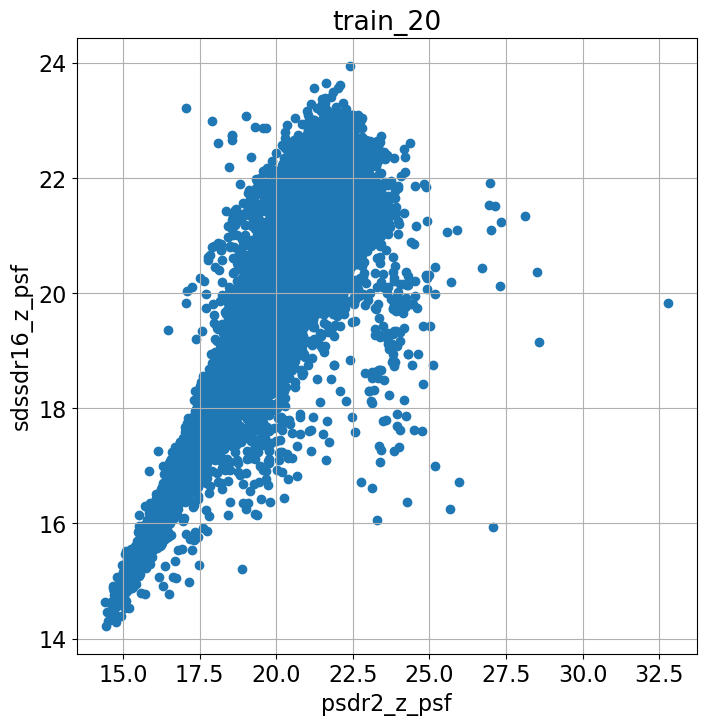

In [150]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(8, 8))
plt.grid()

plt.scatter(train_20['psdr2_z_psf'], train_20['sdssdr16_z_psf']);
plt.title('train_20')
plt.xlabel('psdr2_z_psf')
plt.ylabel('sdssdr16_z_psf')

Text(0, 0.5, 'decals8tr_z')

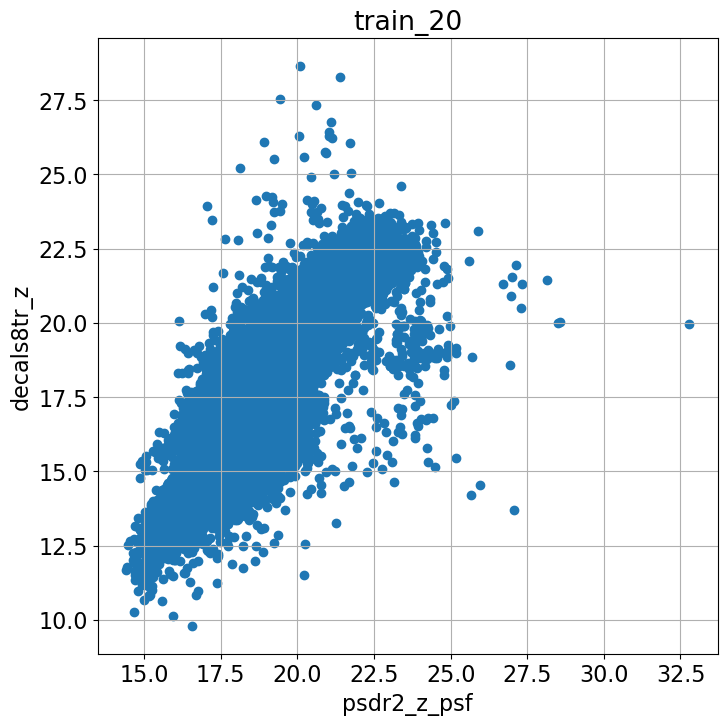

In [151]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(8, 8))
plt.grid()

plt.scatter(train_20['psdr2_z_psf'], train_20['decals8tr_z']);
plt.title('train_20')
plt.xlabel('psdr2_z_psf')
plt.ylabel('decals8tr_z')

Text(0, 0.5, 'sdssdr16_z_psf')

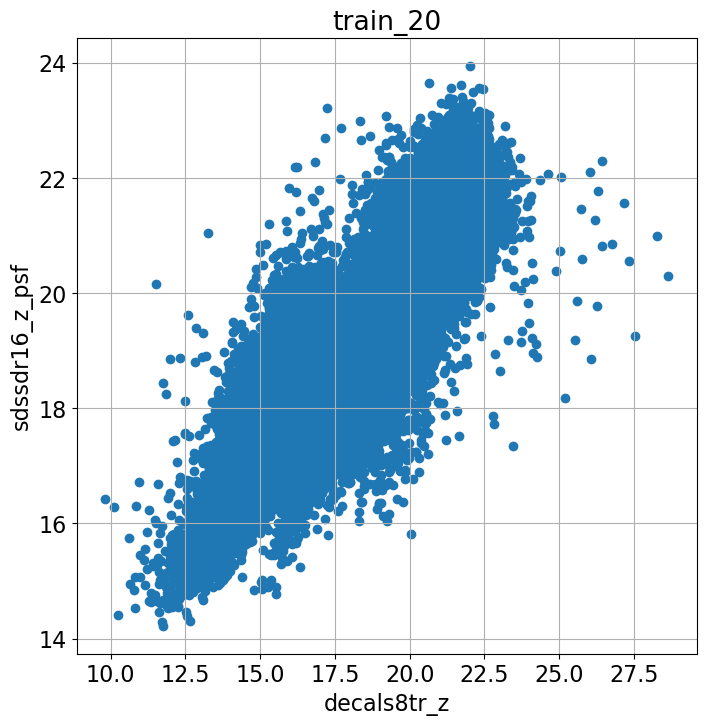

In [152]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(8, 8))
plt.grid()

plt.scatter(train_20['decals8tr_z'], train_20['sdssdr16_z_psf']);
plt.title('train_20')
plt.xlabel('decals8tr_z')
plt.ylabel('sdssdr16_z_psf')

Text(0, 0.5, 'sdssdr16_z_psf')

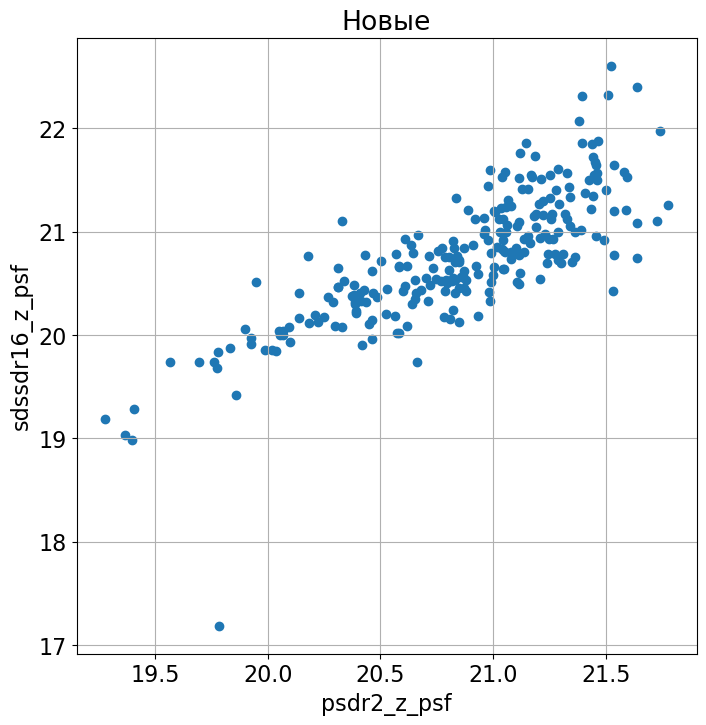

In [153]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(8, 8))
plt.grid()

plt.scatter(feas_HZQ_01['psdr2_z_psf'], feas_HZQ_01['sdssdr16_z_psf']);
plt.title('Новые')
plt.xlabel('psdr2_z_psf')
plt.ylabel('sdssdr16_z_psf')

Text(0, 0.5, 'decals8tr_z')

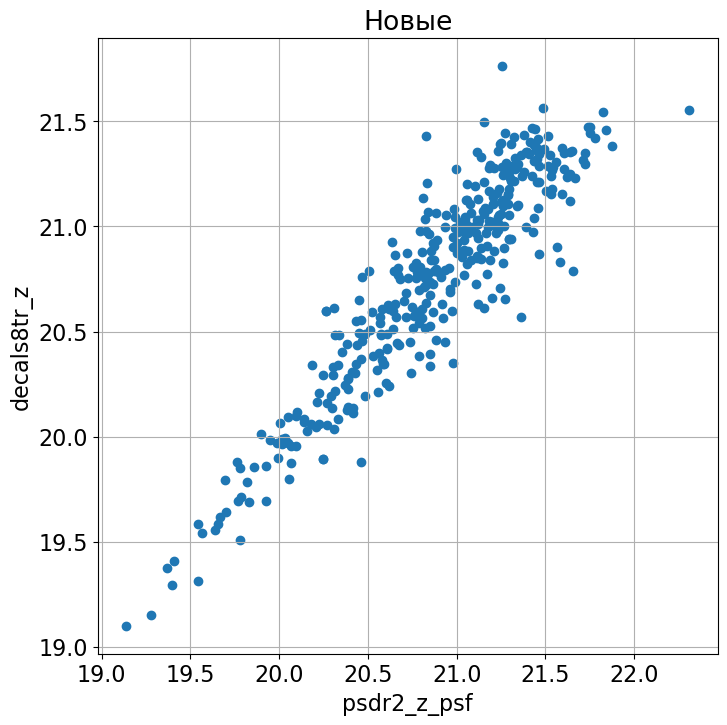

In [154]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(8, 8))
plt.grid()

plt.scatter(feas_HZQ_01['psdr2_z_psf'], feas_HZQ_01['decals8tr_z']);
plt.title('Новые')
plt.xlabel('psdr2_z_psf')
plt.ylabel('decals8tr_z')

Text(0, 0.5, 'sdssdr16_z_psf')

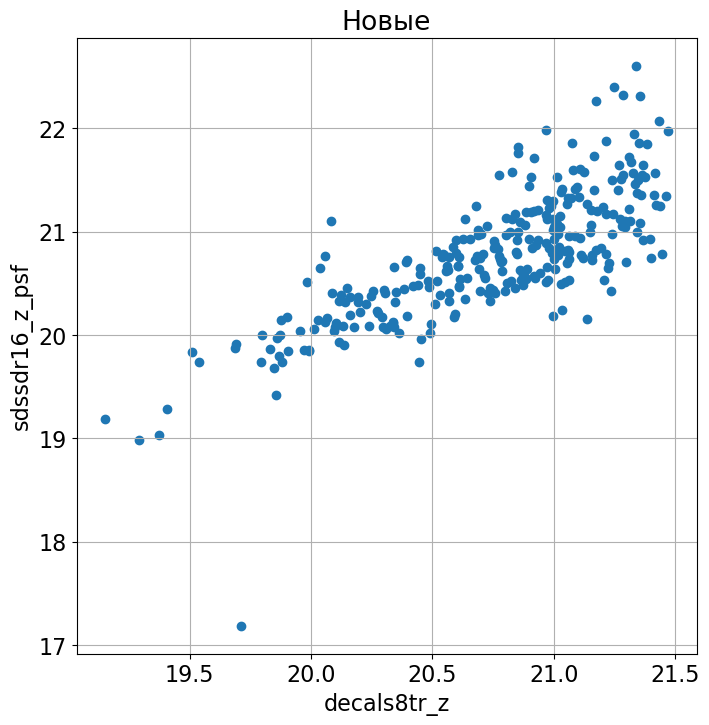

In [155]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(8, 8))
plt.grid()

plt.scatter(feas_HZQ_01['decals8tr_z'], feas_HZQ_01['sdssdr16_z_psf']);
plt.title('Новые')
plt.xlabel('decals8tr_z')
plt.ylabel('sdssdr16_z_psf')

In [130]:
preds = pd.read_pickle(
    f'{data_dir}/part-00000.new_HZQ.predictions.x1.gz_pkl',
    compression='gzip'
)

In [132]:
preds.columns

Index(['zoo_x135_z_pdf', 'zoo_x135_z_max', 'zoo_x135_z_max_proba',
       'zoo_x135_z_maxConf', 'zoo_x135_proba_z_ge_3', 'zoo_x135_ci1a_68',
       'zoo_x135_ci1b_68', 'zoo_x135_ci2_68_short', 'zoo_x135_ci2_68',
       'zoo_x135_ci2_68_peaks', 'zoo_x135_ci2_68_peaks_proba',
       'zoo_x135_ci2_68_peaks_zConf', 'zoo_x135_ci1a_90', 'zoo_x135_ci1b_90',
       'zoo_x135_ci2_90_short', 'zoo_x135_ci2_90', 'zoo_x135_ci2_90_peaks',
       'zoo_x135_ci2_90_peaks_proba', 'zoo_x135_ci2_90_peaks_zConf',
       'zoo_x135_ci1a_95', 'zoo_x135_ci1b_95', 'zoo_x135_ci2_95_short',
       'zoo_x135_ci2_95', 'zoo_x135_ci2_95_peaks',
       'zoo_x135_ci2_95_peaks_proba', 'zoo_x135_ci2_95_peaks_zConf',
       'zoo_x135_mean', 'zoo_x135_std', 'zoo_x135_skewness',
       'zoo_x135_kurtosis', 'zoo_x135_entropy',
       'zoo_x135_ProcessPredictionsError'],
      dtype='object')